The code here is based on the page https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

Cross-validation (CV) is a good method to evaluate a model by testing its performance on different subsets of a training data. However, when one needs to tune both hyperparameters and train models during model training, the standard CV will overestimate the performance of the final model due to the training process is biased towards the training data when tuning/selecting hyperparameters.

One solution for this is nested cross-validation (nested CV). In this training process, as its name stated, there will be outer and inner CV. The outer CV splits the data as the same way as the standard CV, but for each fold's training data, the inner CV will run a standard CV on it, during which the best hyperparameters will be chosen and a final model trained on the whole fold's training data will be evaluated on the corresponding fold's test data. Since this test fold data is never used in hyperparameter selection or model training, it behaves like independent test data and thus give unbiased performance estimate.

# Import Required Libraries
Import the necessary libraries including numpy, matplotlib, and scikit-learn components for datasets, model selection, and SVM.

In [1]:
# **Import Required Libraries**

# Import the necessary libraries including numpy, matplotlib, and scikit-learn components for datasets, model selection, and SVM.
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC

# Load the Iris Dataset
Load the Iris dataset from scikit-learn and prepare X and y variables for model training.

In [2]:
# **Load the Iris Dataset**

# Load the Iris dataset from scikit-learn and prepare X and y variables for model training.
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set Up Model and Parameters
Define the SVM model with 'rbf' kernel and set up the parameter grid for hyperparameter optimization.

In [3]:
# **Set Up Model and Parameters**

# Define the SVM model with 'rbf' kernel and set up the parameter grid for hyperparameter optimization.
svm = SVC(kernel="rbf")
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# Implement Cross-Validation
Set up the cross-validation approach, defining inner and outer CV loops for the nested cross-validation structure.
We will run the comparison using 30 random trials, in each try we will build models using both standard CV and nested CV, and then compare the scores from the two models.

In [4]:
# **Implement Cross-Validation**

# Set the number of random trials
NUM_TRIALS = 30

# Initialize arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Define cross-validation techniques for the inner and outer loops
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

# Show the score difference

In [8]:
score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

Average difference of 0.007581 with std. dev. of 0.007833.


# Plot the score difference in each trial

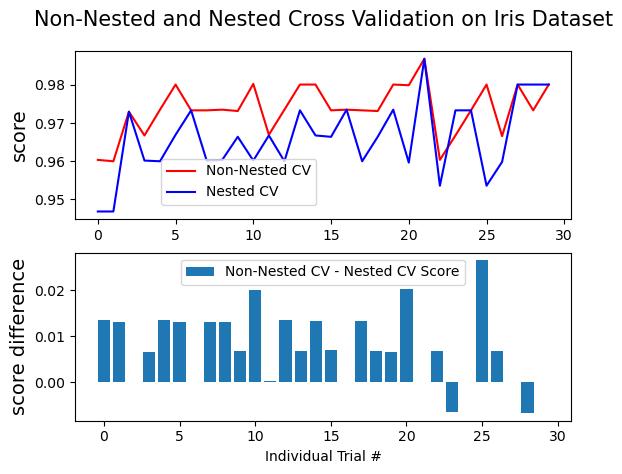

In [6]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

# Referrences

- Cross validation doesn't give you the best parameters by a performance evaluation: https://stats.stackexchange.com/questions/11602/training-on-the-full-dataset-after-cross-validation

- How to get final model after nested corss-validation: https://stats.stackexchange.com/questions/254612/how-to-obtain-optimal-hyperparameters-after-nested-cross-validation

- Feature selection and cross-validation: https://stats.stackexchange.com/questions/27750/feature-selection-and-cross-validation

- Cross-validation and stepwise feature selection in regression: https://stats.stackexchange.com/questions/610210/how-does-cross-validation-works-for-feature-selection-using-stepwise-regression
